In [9]:
def Initialize(count): # задаем список из count городов и случайно их перемешиваем
    solution = np.arange(count)
    np.random.shuffle(solution)
    return solution

# Вычесление вероятности P
def GetTransitionProbability(dE, T):
    P = np.exp(-dE / T)
    return P

# Есть отрезок [0, 1] и его поделили на 2 части. 
# Соответсвенно если число меньше P, то совершаем переход, в противном случае нет
def IsTransition(probability):
    if((probability > 1) or (probability < 0)):
        error('Violation of argument constraint')
        
    value = np.random.uniform() #  генерирует случайное число от 0.0 до 1.0
    if(value < probability):
        a = 1
    else:
        a = 0
    
    return a

# Реализация функции F, которая порождает новое состояние
def GenerateStateCandidate(current):
    new = current.copy()
    index_a = np.random.randint(len(current))
    index_b = np.random.randint(len(current))
    while index_b == index_a:
        index_b = np.random.randint(len(current))
    if(index_a > index_b):
        new[index_b:index_a] = np.flip(new[index_b:index_a])
    else:
        new[index_a:index_b] = np.flip(new[index_a:index_b])
    return new

# Вычисление энергии E
def CalculateEnergy(cities, cur):
    E = 0
    for i in range(len(cities)):
        ind_1 = cur[i]
        ind_2 = cur[i - 1]
        x_dist = cities[ind_1][0] - cities[ind_2][0] 
        y_dist = cities[ind_1][1] - cities[ind_2][1]
        E = E + np.sqrt(x_dist ** 2 + y_dist ** 2)
    return E

def Draw(width, height, cities, solution, infos):
    frame = np.zeros((height, width, 3))
    for i in range(len(cities)):
        index_a = solution[i]
        index_b = solution[i - 1]
        cv2.line(frame, (int(cities[index_a][0]), int(cities[index_a][1])), (int(cities[index_b][0]), int(cities[index_b][1])), GREEN, 2)
    for city in cities:
        cv2.circle(frame, (int(city[0]), int(city[1])), 5, RED, -1)
    cv2.putText(frame, f"Temperature", (25, 50), FONT, SIZE, WHITE)
    cv2.putText(frame, f"Score", (25, 75), FONT, SIZE, WHITE)
    cv2.putText(frame, f"Best Score", (25, 100), FONT, SIZE, WHITE)
    cv2.putText(frame, f"Worst Score", (25, 125), FONT, SIZE, WHITE)
    cv2.putText(frame, f"Iterations", (25, 150), FONT, SIZE, WHITE)
    cv2.putText(frame, f": {infos[0]:.2f}", (200, 50), FONT, SIZE, WHITE)
    cv2.putText(frame, f": {infos[1]:.2f}", (200, 75), FONT, SIZE, WHITE)
    cv2.putText(frame, f": {infos[2]:.2f}", (200, 100), FONT, SIZE, WHITE)
    cv2.putText(frame, f": {infos[3]:.2f}", (200, 125), FONT, SIZE, WHITE)
    cv2.putText(frame, f": {infos[4]:.2f}", (200, 150), FONT, SIZE, WHITE)
    cv2.imshow("Simulated Annealing", frame)
    cv2.waitKey(5)
    
def SimulatedAnnealing(cities, T0, T_end):
    current_solution = Initialize(array_len)
    currentEnergy = CalculateEnergy(cities, current_solution) # вычисляем энергию для первого состояния
    T = T0
    best_Energy = worst_Energy = currentEnergy
    min_solution = current_solution
    i = 0
    while(T > T_end):  # на всякий случай ограничеваем количество итераций
    # может быть полезно при тестировании сложных функций изменения температуры T       

        new_solution = GenerateStateCandidate(current_solution) # получаем новое решение
        candidateEnergy = CalculateEnergy(cities, new_solution) # вычисляем его энергию
        best_Energy = min(best_Energy, candidateEnergy)
        worst_Energy = max(worst_Energy, candidateEnergy)
        
        if(candidateEnergy < currentEnergy): # если кандидат обладает меньшей энергией
            currentEnergy = candidateEnergy # то оно становится текущим состоянием
            current_solution = new_solution
        else:
            p = GetTransitionProbability(candidateEnergy - currentEnergy, T) # иначе, считаем вероятность
            if (IsTransition(p) == 1): # и смотрим, осуществится ли переход
                currentEnergy = candidateEnergy
                current_solution = new_solution

        T *= 0.9995 # уменьшаем температуру
        i += 1
        infos = (T, currentEnergy, best_Energy, worst_Energy, i)
        Draw(WIDTH, HEIGHT, cities, current_solution, infos)

9849.645760115627
Wall time: 4.97 s


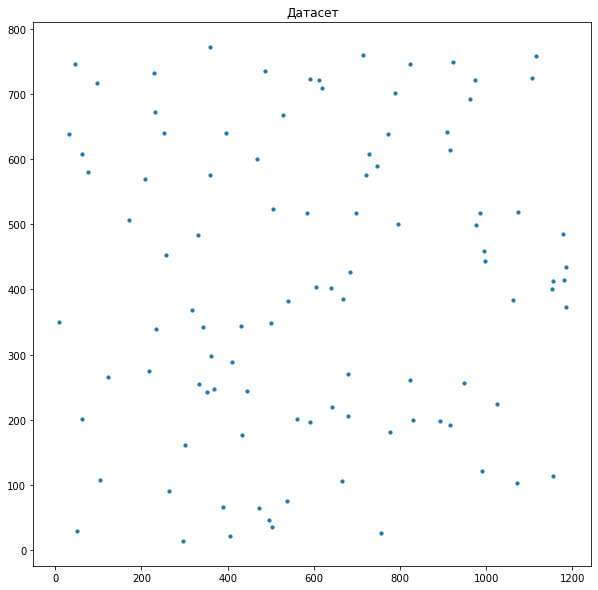

In [17]:
%%time
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2

# Задаем начальные минимальную и максимальную температуры
t_min = 1 # ЧЕМ БОЛЬШЕ НУЛЕЙ ТЕМ БОЛЬШЕ ИТЕРАЦИЙ. В ДАННОМ СЛУЧАЕ СЕЙЧАС СТОИТ 10000 ИТЕРАЦИЙ
t_max = 100
WIDTH = 1200
HEIGHT = 780
FONT = cv2.FONT_HERSHEY_DUPLEX
SIZE = 0.7
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (0, 0, 255)
# Задаем датасет
array_len = 100 # КОЛИЧЕСТВО ТОЧЕК
cities = np.zeros((array_len, 2))
for i in range(array_len):
    position_x = random.randint(0, WIDTH)
    position_y = random.randint(0, HEIGHT)
    cities[i][0] = position_x 
    cities[i][1] = position_y
#print(cities)
#Визуализируем датасет
plt.figure(figsize = (10, 10))
plt.title("Датасет")
plt.scatter(cities[..., 0], cities[..., 1], 10)

SimulatedAnnealing(cities, t_max, t_min)